# Exploratory Data Analysis - Example

Sources: 

- Exploratory Data Analysis in Python — A Step-by-Step Process
https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

- Complete Exploratory Data Analysis using Python 
https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4

- Comprehensive Guide to Exploratory Data Analysis (EDA) with Python
https://medium.com/@sanjayskumar4010/comprehensive-guide-to-exploratory-data-analysis-eda-with-python-f6e4ad672113

In [1]:
# !cd CommunicatingWithData/01_exploratory_data_analysis
!pwd

/Users/markjack/GSU_Fall2024/MSA8030/CommunicatingWithData/01_exploratory_data_analysis


## Introduction

### "From Raw Data To Feature Engineering"

![alt text](exp_data_analysis_1.png "From Raw Data To Feature Engineering")

### "The Steps of Exploratory Data Analysis"

![alt text](exp_data_analysis_2.png "The Steps of Exploratory Data Analysis")

### "The Data Cleaning Cycle"

![alt text](exp_data_analysis_3.png "The Data Cleaning Cycle")

## General Steps

1. Understanding the Business Problem
2. Setting Up Your Environment
3. Loading the Dataset
4. Description of Your Variables (Features) - Setting Up Your Data Dictionary
5. Understanding Your Data
6. Data Cleaning
7. Data Exploration with Data Visualization
    - Uni-variate Analysis (With Outlier Detection)
    - Bi-variate Analysis
    - Multivariate Analysis 
8. Brainstorming, Feedback From The Stakeholders, Feature Engineering, Model Building, and Iterating

### 1. Understanding the Business Problem

Exploratory data analysis (EDA) enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis.

It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business.

It’s thanks to EDA that we can ask ourselves meaningful questions that can impact business.




![alt text](exp_data_analysis_4.png "Developing A Report - Moving Towards A Model")


A good approach to EDA therefore allows us to provide added value to many business contexts, especially where stakeholders (internal or external) find difficulties in the interpretation or access to data.

#### Business problem here:

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.



### 2. Setting Up Your Environment

In [2]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis

from scipy.stats import chi2_contingency, ttest_ind, zscore, f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

### 3. Loading the Dataset

Medical Cost Personal Dataset:

Source: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
!pwd

/Users/markjack/GSU_Fall2024/MSA8030/CommunicatingWithData/01_exploratory_data_analysis


In [4]:
df = pd.read_csv('insurance.csv')

### 4. Description of Your Variables (Features) - Setting Up Your Data Dictionary

What are the features (variables) in your dataset? Provide a clear, detailed description of each feature.

- Age: Age of the primary beneficiary
- Sex: Insurance contractor gender, female, male
- BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height,
an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children: Number of children covered by health insurance / Number of dependents
- Smoker: Smoking
- Region: The beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.
- Charges: Individual medical costs billed by health insurance

### 5. Understanding Your Data

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
list(df.sex.unique())

['female', 'male']

### 6. Data Cleaning

- Missing Values
- Duplicated Values
- Irregular Cardinality (Categorical Variables)
- Correcting Data Types


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
df.drop_duplicates(keep='first', inplace=True)

### 7. Data Exploration with Data Visualization

#### 7.1 Uni-variate Analysis

Analysis of single features: 

We can perform uni-variate analysis with 3 options:

- Summary Statistics
- Frequency Distributions Table
- Charts ( Boxplot, Histogram, Barplot, Pie Chart)

Numerical features:

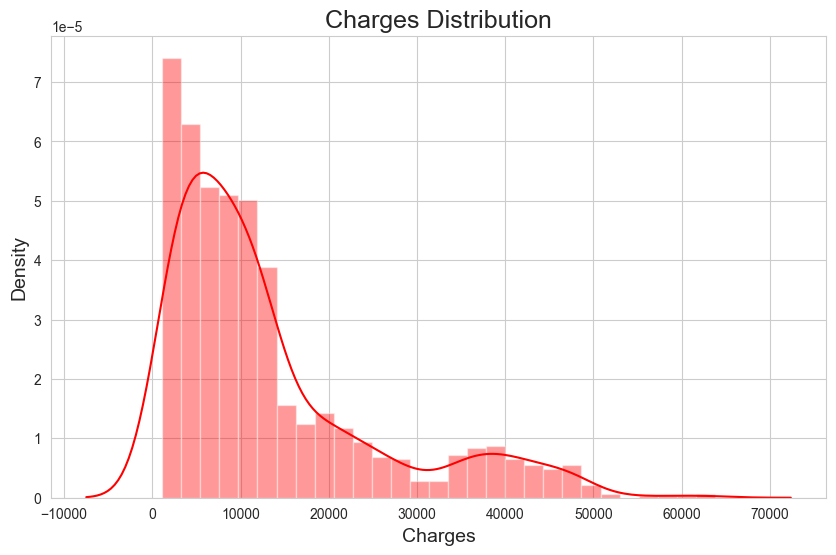

In [16]:
# Charges:

plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

Kernel density estimation:

Examples of skew in a data distribution:

![alt text](exp_data_analysis_5.png "Skew of data distributions")



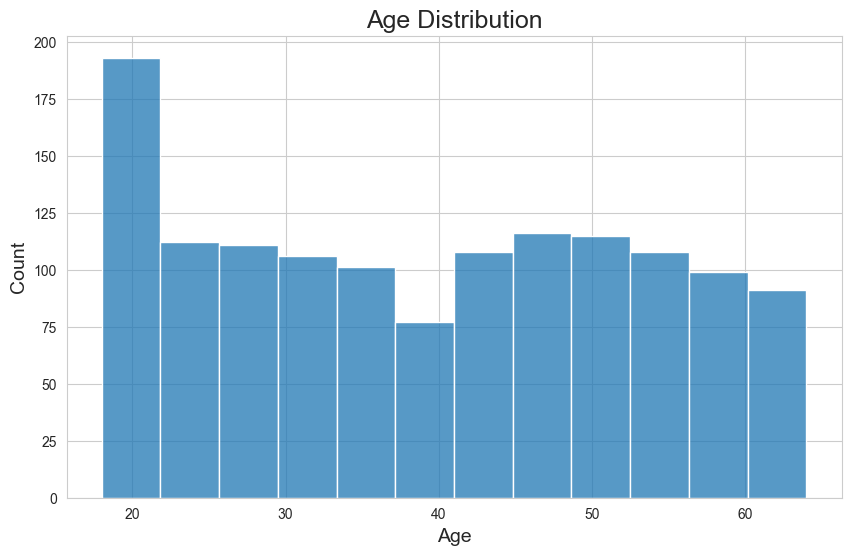

In [17]:
# Age:

plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

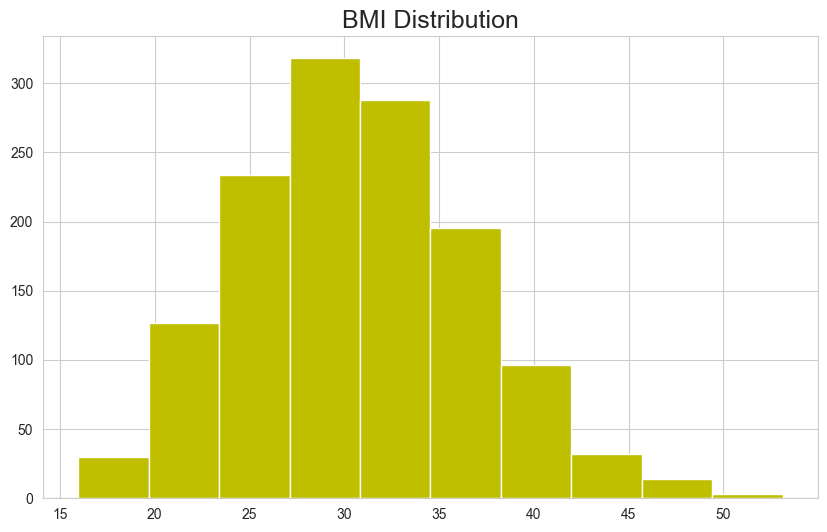

In [18]:
# BMI (body mass index):

plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

Boxplot Schematic for Numerical Values:

A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

![alt text](exp_data_analysis_6.png "Boxplot for Numerical Values")

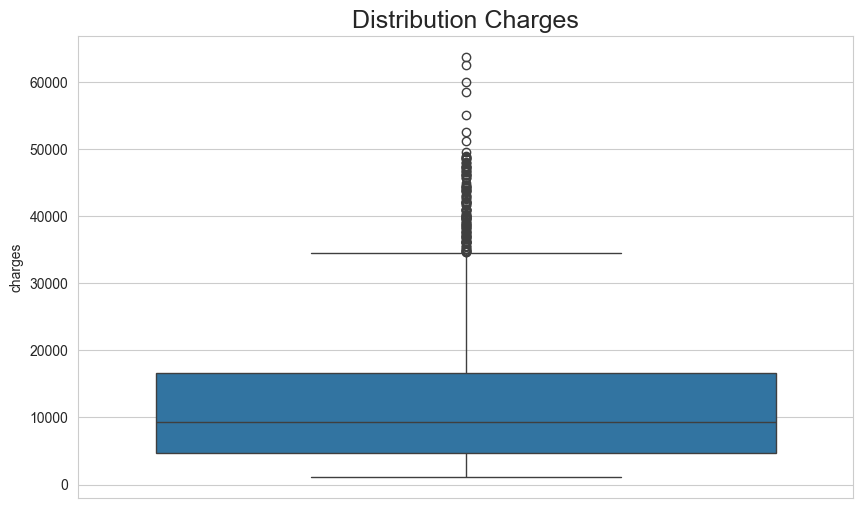

In [19]:
# Boxplot for numerical feature 'charges':

plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

Outlier Detection:

Removal of outliers using **interquartile range (IQR) method**:

In [20]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [21]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [22]:
df.shape

(1337, 7)

Alternative: Using Z-score to detect outliers

In [23]:
z_scores = zscore(df['charges'])
outliers = np.where(np.abs(z_scores) > 3)
outliers

(array([  34,  543,  577,  818, 1145, 1229, 1299]),)

In [24]:
# df = df.drop(outliers[0])

Categorical features:

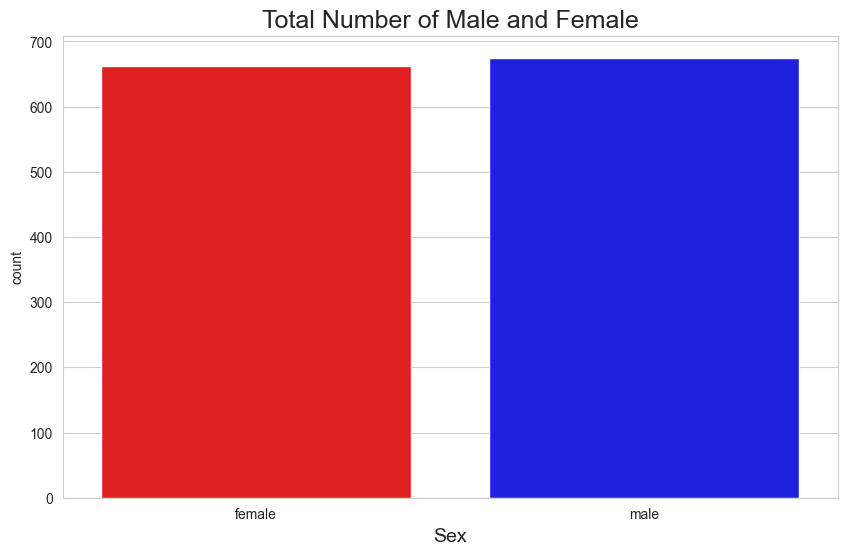

In [25]:
# Gender:

plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df, palette=['red', 'blue'])
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

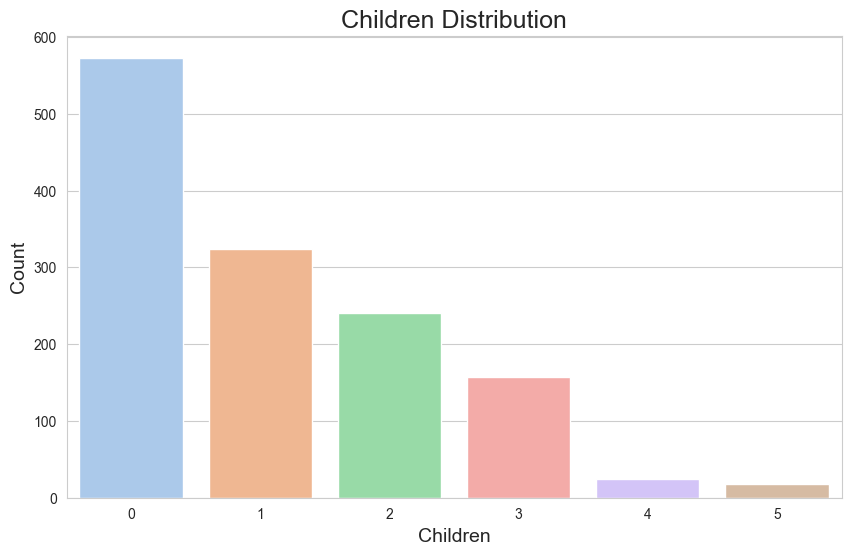

In [26]:
# Children:

plt.figure(figsize = (10,6))
sns.countplot(x = 'children', data = df, palette='pastel')
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

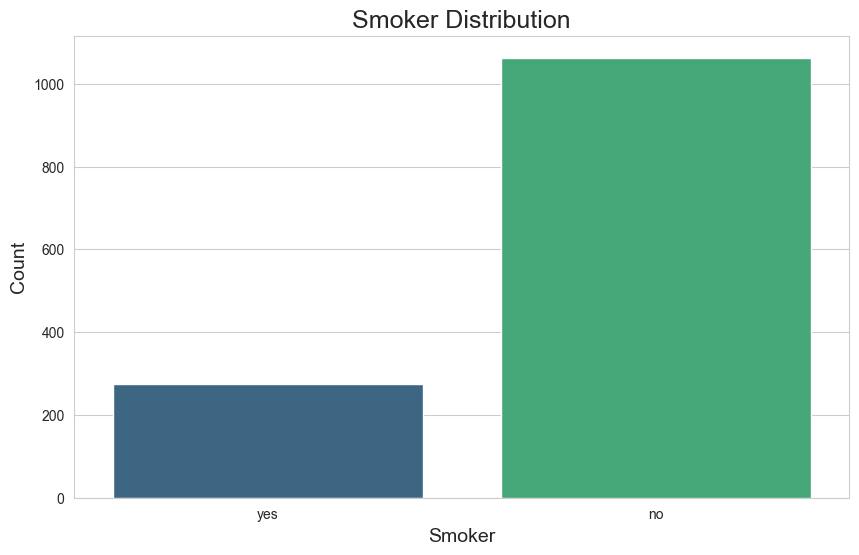

In [27]:
# Smoker:

plt.figure(figsize = (10,6))
sns.countplot(x = 'smoker', data = df, palette='viridis')
plt.title('Smoker Distribution', size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [28]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

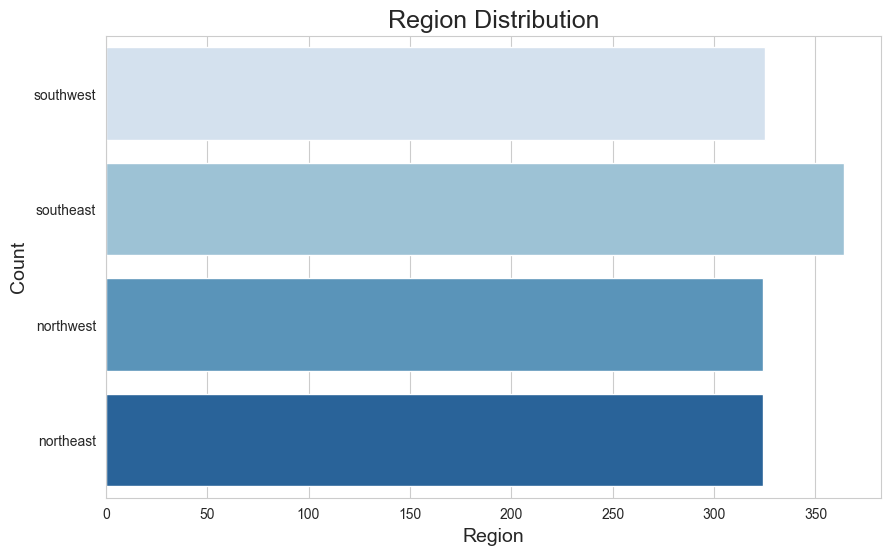

In [29]:
# Region:

plt.figure(figsize = (10,6))
sns.countplot(df.region, palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### 7.2 Bi-variate Analysis

Bi-variate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bi-variate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

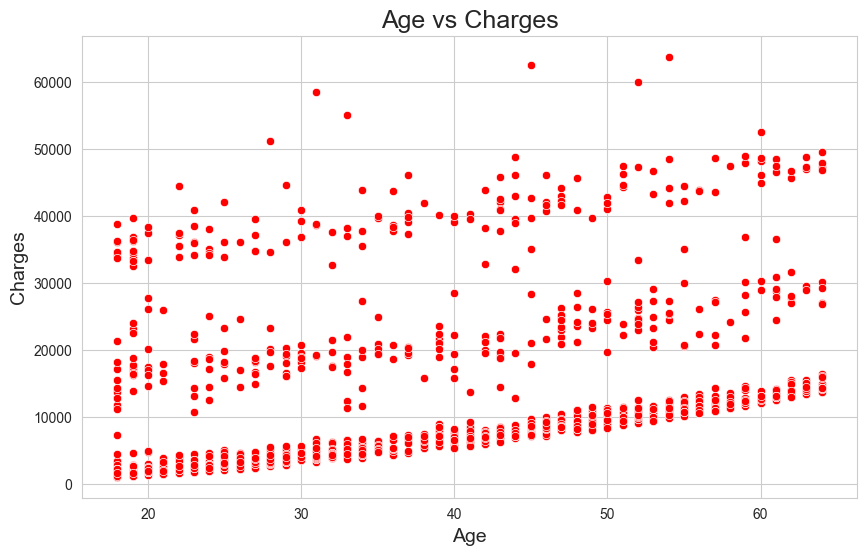

In [30]:
# Age vs Charges:

plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

In [31]:
print('Correlation between age and charges is : {}'.format(round(df.corr(numeric_only=True)['age']['charges'], 3)))

Correlation between age and charges is : 0.298


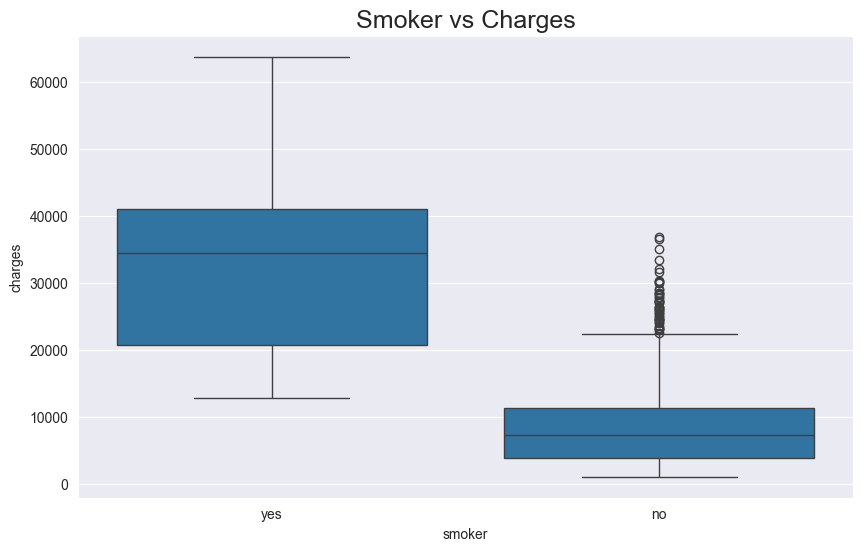

In [32]:
# Smoker vs Charges:

plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18)
plt.show()

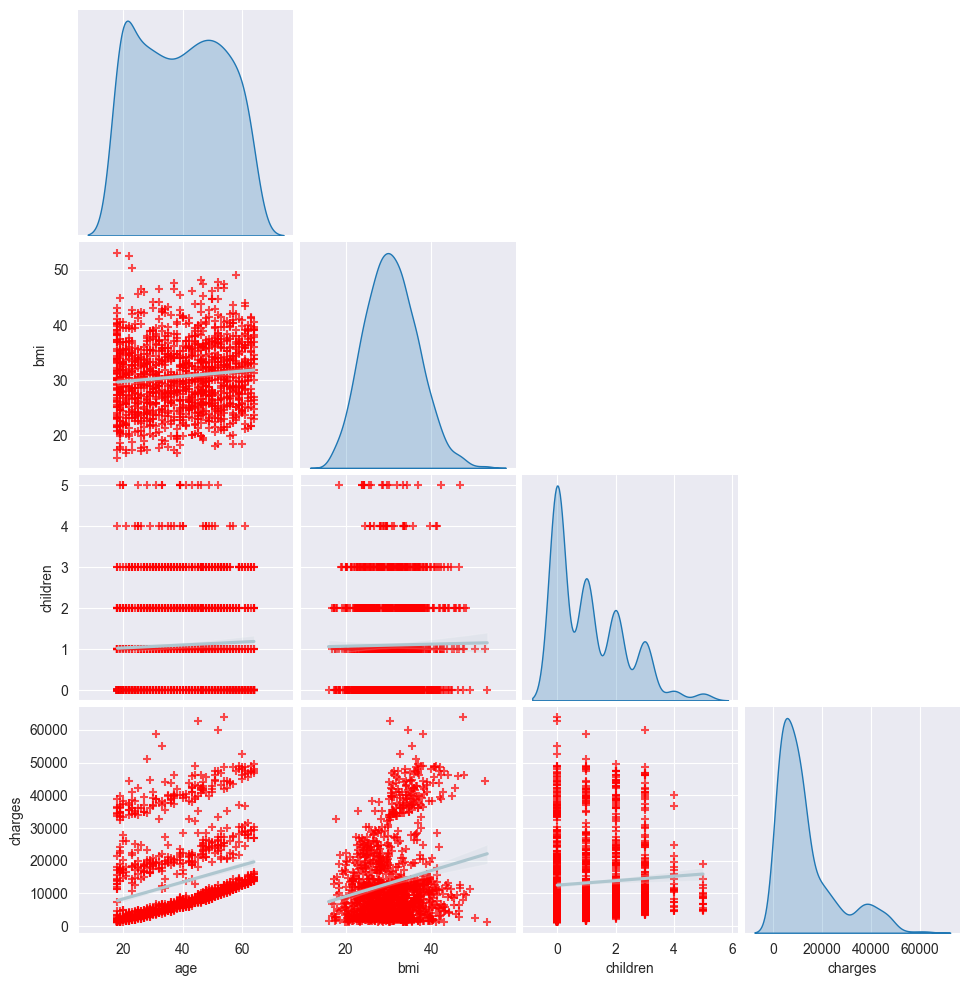

In [33]:
# Using Pairplot for Numerical Values:

sns.pairplot(
    df, 
    markers="+",
    diag_kind="kde",
    kind='reg',
    plot_kws={'line_kws':{'color':'#aec6cf'}, 
    'scatter_kws': {'alpha': 0.7, 
    'color': 'red'}},
    corner=True
    )

#### 7.3 Multivariate Analysis

Measuring Correlation between features:

![alt text](exp_data_analysis_7.png "Boxplot for Numerical Values")

Different methods:
1. Pearson
2. Kendall
3. Spearman

Typical visualization method: **Heatmap** combined with **correlation** method


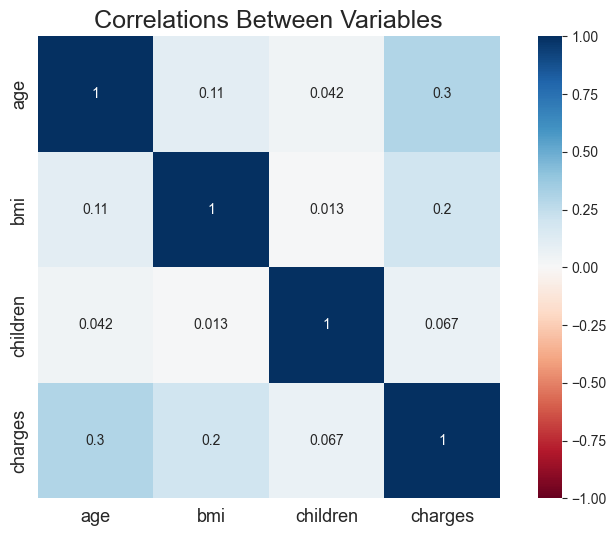

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

### 8. Brainstorming, Feedback From The Stakeholders, Feature Engineering, Model Building, and Iterating

At this point of the analysis we have several things we can do:

- Create a report for the stakeholders
- Get feedback from the business / project stakeholders
- Continue with the exploration to further clarify business questions with constant feedback loops with the stakeholders
- This also includes:
    * *Statistical (Hypothesis) Testing:* Apply statistical tests to validate hypotheses and explore significant relationships in the data.
    * *Feature Engineering:* Create new features from existing data to improve model performance or extract more meaningful insights.
- Distill the **use case** to explore and convince the business / project stakeholders
- Start the modeling.
- Iterate above process to further align use case with business problem and improve model performance.

The importance of asking the right questions:

Regardless of the path we take after the EDA, asking the right questions is what separates a good data analyst from a mediocre one. We may be experts with the tools and tech, but these skills are relatively useless if we are unable to retrieve information from the data.

